<h1>Chapter 3 - Looking Inside Transformer LLMs</h1>
<i>An extensive look into the transformer architecture of generative LLMs</i>

<a href="https://www.amazon.com/Hands-Large-Language-Models-Understanding/dp/1098150961"><img src="https://img.shields.io/badge/Buy%20the%20Book!-grey?logo=amazon"></a>
<a href="https://www.oreilly.com/library/view/hands-on-large-language/9781098150952/"><img src="https://img.shields.io/badge/O'Reilly-white.svg?logo=data:image/svg%2bxml;base64,PHN2ZyB3aWR0aD0iMzQiIGhlaWdodD0iMjciIHZpZXdCb3g9IjAgMCAzNCAyNyIgZmlsbD0ibm9uZSIgeG1sbnM9Imh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIj4KPGNpcmNsZSBjeD0iMTMiIGN5PSIxNCIgcj0iMTEiIHN0cm9rZT0iI0Q0MDEwMSIgc3Ryb2tlLXdpZHRoPSI0Ii8+CjxjaXJjbGUgY3g9IjMwLjUiIGN5PSIzLjUiIHI9IjMuNSIgZmlsbD0iI0Q0MDEwMSIvPgo8L3N2Zz4K"></a>
<a href="https://github.com/HandsOnLLM/Hands-On-Large-Language-Models"><img src="https://img.shields.io/badge/GitHub%20Repository-black?logo=github"></a>
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/HandsOnLLM/Hands-On-Large-Language-Models/blob/main/chapter03/Chapter%203%20-%20Looking%20Inside%20LLMs.ipynb)

---

This notebook is for Chapter 3 of the [Hands-On Large Language Models](https://www.amazon.com/Hands-Large-Language-Models-Understanding/dp/1098150961) book by [Jay Alammar](https://www.linkedin.com/in/jalammar) and [Maarten Grootendorst](https://www.linkedin.com/in/mgrootendorst/).

---

<a href="https://www.amazon.com/Hands-Large-Language-Models-Understanding/dp/1098150961">
<img src="https://raw.githubusercontent.com/HandsOnLLM/Hands-On-Large-Language-Models/main/images/book_cover.png" width="350"/></a>

### [OPTIONAL] - Installing Packages on <img src="https://colab.google/static/images/icons/colab.png" width=100>

If you are viewing this notebook on Google Colab (or any other cloud vendor), you need to **uncomment and run** the following codeblock to install the dependencies for this chapter:

---

💡 **NOTE**: We will want to use a GPU to run the examples in this notebook. In Google Colab, go to
**Runtime > Change runtime type > Hardware accelerator > GPU > GPU type > T4**.

---


In [1]:
%%capture
!pip install transformers>=4.41.2 accelerate>=0.31.0

# Loading the LLM

In [2]:
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

# Load model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3-mini-4k-instruct")

model = AutoModelForCausalLM.from_pretrained(
    "microsoft/Phi-3-mini-4k-instruct",
    device_map="cuda",
    torch_dtype="auto",
    trust_remote_code=False,
)

# Create a pipeline
generator = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    return_full_text=False,
    max_new_tokens=50,
    do_sample=False,
)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/306 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/599 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/967 [00:00<?, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

Device set to use cuda
The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


#### Understanding the Model Architecture

Recall from Chapter 3 that Transformer LLMs consist of stacked transformer blocks, each containing self-attention and feedforward layers. Let's examine the Phi-3 model structure we just loaded.

In [44]:
# Explore the model architecture - this implements concepts from Chapter 3, Figure 3-5
print(f"Model has {len(model.model.layers)} transformer blocks")
print(f"Vocabulary size: {model.config.vocab_size}")
print(f"Hidden dimension: {model.config.hidden_size}")
print(f"Number of attention heads: {model.config.num_attention_heads}")
print(f"\nFirst transformer block structure:")
print(model.model.layers[0])

Model has 32 transformer blocks
Vocabulary size: 32064
Hidden dimension: 3072
Number of attention heads: 32

First transformer block structure:
Phi3DecoderLayer(
  (self_attn): Phi3Attention(
    (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
    (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
  )
  (mlp): Phi3MLP(
    (gate_up_proj): Linear(in_features=3072, out_features=16384, bias=False)
    (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
    (activation_fn): SiLU()
  )
  (input_layernorm): Phi3RMSNorm((3072,), eps=1e-05)
  (post_attention_layernorm): Phi3RMSNorm((3072,), eps=1e-05)
  (resid_attn_dropout): Dropout(p=0.0, inplace=False)
  (resid_mlp_dropout): Dropout(p=0.0, inplace=False)
)


# The Inputs and Outputs of a Trained Transformer LLM


In [45]:
prompt = "Write an email apologizing to Sarah for the tragic gardening mishap. Explain how it happened."

output = generator(prompt)

print(output[0]['generated_text'])

 Mention the steps you're taking to prevent it in the future.

Dear Sarah,

I hope this message finds you well. I am writing to express my sincerest apologies for the unfortunate incident that occurred


In [46]:
print(model)

Phi3ForCausalLM(
  (model): Phi3Model(
    (embed_tokens): Embedding(32064, 3072, padding_idx=32000)
    (layers): ModuleList(
      (0-31): 32 x Phi3DecoderLayer(
        (self_attn): Phi3Attention(
          (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
          (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
        )
        (mlp): Phi3MLP(
          (gate_up_proj): Linear(in_features=3072, out_features=16384, bias=False)
          (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
          (activation_fn): SiLU()
        )
        (input_layernorm): Phi3RMSNorm((3072,), eps=1e-05)
        (post_attention_layernorm): Phi3RMSNorm((3072,), eps=1e-05)
        (resid_attn_dropout): Dropout(p=0.0, inplace=False)
        (resid_mlp_dropout): Dropout(p=0.0, inplace=False)
      )
    )
    (norm): Phi3RMSNorm((3072,), eps=1e-05)
    (rotary_emb): Phi3RotaryEmbedding()
  )
  (lm_head): Linear(in_features=3072, out_features=32064, 

# Choosing a single token from the probability distribution (sampling / decoding)

In [47]:
prompt = "The capital of France is"

# Tokenize the input prompt
input_ids = tokenizer(prompt, return_tensors="pt").input_ids

# Tokenize the input prompt
input_ids = input_ids.to("cuda")

# Get the output of the model before the lm_head
model_output = model.model(input_ids)

# Get the output of the lm_head
lm_head_output = model.lm_head(model_output[0])

In [48]:
token_id = lm_head_output[0,-1].argmax(-1)
tokenizer.decode(token_id)

'Paris'

In [49]:
model_output[0].shape

torch.Size([1, 5, 3072])

In [50]:
lm_head_output.shape

torch.Size([1, 5, 32064])

## Deep Dive: Tracing the Forward Pass

As explained in Chapter 3 (Figure 3-4), the forward pass flows through tokenizer → transformer blocks → LM head. Let's trace this path step by step.

In [51]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import time

In [52]:
# Complete working example - tracing the forward pass
prompt = "The capital of USA is"
input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to("cuda")

# Step 1: Embeddings
embeddings = model.model.embed_tokens(input_ids)
print(f"Step 1 - Embedding shape: {embeddings.shape}")

# Step 2: Pass through the full model (which handles position embeddings internally)
with torch.no_grad():
    # Get the hidden states from all layers
    outputs = model(input_ids, output_hidden_states=True)

    # First transformer block output (after first layer)
    first_block_output = outputs.hidden_states[1]  # Index 0 is embeddings, 1 is after first block
    print(f"Step 2 - First block output shape: {first_block_output.shape}")

    # All blocks output (final hidden state)
    all_blocks_output = outputs.hidden_states[-1]
    print(f"Step 3 - All blocks output shape: {all_blocks_output.shape}")

    # Step 4: LM head for token probabilities (already computed in outputs)
    logits = outputs.logits
    print(f"Step 4 - Logits shape: {logits.shape}")

# Get the predicted next token
next_token_id = logits[0, -1].argmax()
print(f"\nPredicted next token: '{tokenizer.decode(next_token_id)}'")

Step 1 - Embedding shape: torch.Size([1, 5, 3072])
Step 2 - First block output shape: torch.Size([1, 5, 3072])
Step 3 - All blocks output shape: torch.Size([1, 5, 3072])
Step 4 - Logits shape: torch.Size([1, 5, 32064])

Predicted next token: 'Washington'


# Speeding up generation by caching keys and values


In [53]:
prompt = "Write a very long email apologizing to Sarah for the tragic gardening mishap. Explain how it happened."

# Tokenize the input prompt
input_ids = tokenizer(prompt, return_tensors="pt").input_ids
input_ids = input_ids.to("cuda")

In [54]:
%%timeit -n 1
# Generate the text
generation_output = model.generate(
  input_ids=input_ids,
  max_new_tokens=100,
  use_cache=True
)

4.98 s ± 666 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [55]:
%%timeit -n 1
# Generate the text
generation_output = model.generate(
  input_ids=input_ids,
  max_new_tokens=100,
  use_cache=False
)

31.2 s ± 138 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Your Turn
Now let's apply what we learned from Chapter 3 with practical experiments. Each task has a working example you can run, followed by an exercise where you modify the code.

## Task 1: Vocabulary Exploration
Recall from Chapter 3 Notes (page 8) that the LM head outputs probabilities for every token in the vocabulary.

In [56]:
# EXAMPLE: See the top 10 most probable next tokens
prompt = "The weather today is"
input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to("cuda")

# Get model output
model_output = model.model(input_ids)
lm_head_output = model.lm_head(model_output[0])

# Get probabilities using softmax
import torch.nn.functional as F
probabilities = F.softmax(lm_head_output[0, -1], dim=-1)

# Get top 10 tokens
top_probs, top_indices = torch.topk(probabilities, 10)

print(f"Top 10 predictions after '{prompt}':\n")
for i in range(10):
    token = tokenizer.decode(top_indices[i])
    prob = top_probs[i].item()
    print(f"{i+1:2d}. '{token:15s}': {prob:6.2%}")

Top 10 predictions after 'The weather today is':

 1. 'so             ': 17.77%
 2. 'quite          ': 13.87%
 3. 'absolutely     ':  8.40%
 4. 'perfect        ':  8.40%
 5. 'sun            ':  6.54%
 6. 'beautiful      ':  5.10%
 7. 'really         ':  2.40%
 8. 'a              ':  2.40%
 9. 'sc             ':  1.88%
10. 'warm           ':  1.88%


In [57]:
# YOUR TURN - Task 1: Try different prompts and compare the predictions
# Modify the prompt below and see how predictions change

# TODO: Change this prompt to something else
your_prompt = "The best programming language is"  # <-- MODIFY THIS

input_ids = tokenizer(your_prompt, return_tensors="pt").input_ids.to("cuda")

# TODO: Complete the code to get top 5 predictions instead of 10
model_output = model.model(input_ids)
lm_head_output = model.lm_head(model_output[0])
probabilities = F.softmax(lm_head_output[0, -1], dim=-1)

# TODO: Change this to get top 5
top_probs, top_indices = torch.topk(probabilities, 10)  # <-- CHANGE TO 5

print(f"Your predictions for '{your_prompt}':\n")
# TODO: Modify the loop to show only top 5
for i in range(10):  # <-- CHANGE THIS TOO
    token = tokenizer.decode(top_indices[i])
    prob = top_probs[i].item()
    print(f"{i+1}. '{token}': {prob:.2%}")

Your predictions for 'The best programming language is':

1. 'subject': 31.25%
2. 'one': 14.75%
3. 'a': 14.75%
4. 'the': 8.94%
5. 'often': 5.42%
6. 'not': 2.56%
7. 'Python': 2.56%
8. 'highly': 1.56%
9. 'always': 0.95%
10. 'context': 0.95%


### Reflection Questions - Task 1

Q1) Why does the model assign different probabilities to each token in its vocabulary? How does this relate to the training process described in Chapter 3?

--

Q2) When you changed the prompt, did certain types of words (nouns, verbs, articles) consistently get higher probabilities? What might this tell you about the model's training data?

--

Q3) The model predicts "Paris" after "The capital of France is". Where is this specific knowledge stored in the transformer architecture? (Hint: Think about Chapter 3's discussion of feedforward networks vs attention layers)

--

Q4) If you wanted the model to predict less common completions (like "Lyon" instead of "Paris"), which generation parameter would you adjust and why?

## Task 2: Layer-by-Layer Information Processing
Chapter 3 explained how information flows through transformer layers. Let's see how the model's predictions evolve as data passes through each layer.

In [58]:
# EXAMPLE: See how predictions change through the layers
prompt = "The capital of France is"
input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to("cuda")

# Get hidden states from all layers
with torch.no_grad():
    outputs = model(input_ids, output_hidden_states=True)
    all_hidden_states = outputs.hidden_states  # Tuple of hidden states from each layer

print(f"Number of layers (including embedding): {len(all_hidden_states)}")
print(f"Shape of each hidden state: {all_hidden_states[0].shape}\n")

# Check predictions at different layers
layers_to_check = [0, 8, 16, 24, 32]  # Embedding, early, middle, late, final

for layer_idx in layers_to_check:
    if layer_idx < len(all_hidden_states):
        hidden_state = all_hidden_states[layer_idx]

        # Apply LM head to this layer's output
        logits = model.lm_head(hidden_state)
        probs = F.softmax(logits[0, -1], dim=-1)

        # Get top 5 predictions
        top_probs, top_indices = torch.topk(probs, 5)

        layer_name = "Embedding" if layer_idx == 0 else f"Layer {layer_idx}"
        print(f"{layer_name} predictions:")
        for i in range(5):
            token = tokenizer.decode(top_indices[i])
            prob = top_probs[i].item()
            print(f"  {i+1}. '{token}': {prob:.2%}")
        print()

print("Notice how predictions become more confident and accurate in later layers!")

Number of layers (including embedding): 33
Shape of each hidden state: torch.Size([1, 5, 3072])

Embedding predictions:
  1. 'hed': 0.01%
  2. 'already': 0.00%
  3. 'omer': 0.00%
  4. 'nt': 0.00%
  5. 'indeed': 0.00%

Layer 8 predictions:
  1. 'přek': 0.39%
  2. '﻿': 0.39%
  3. ' ': 0.36%
  4. 'often': 0.28%
  5. 'phantom': 0.23%

Layer 16 predictions:
  1. 'indeed': 29.88%
  2. 'remark': 9.72%
  3. '﻿': 6.30%
  4. 'remarkable': 4.88%
': 4.88%

Layer 24 predictions:
  1. 'Paris': 100.00%
  2. 'París': 0.00%
  3. 'France': 0.00%
  4. 'capital': 0.00%
  5. '_': 0.00%

Layer 32 predictions:
  1. 'Paris': 87.89%
  2. '_': 2.65%
  3. 'not': 1.25%
  4. '...': 0.76%
  5. '
': 0.59%

Notice how predictions become more confident and accurate in later layers!


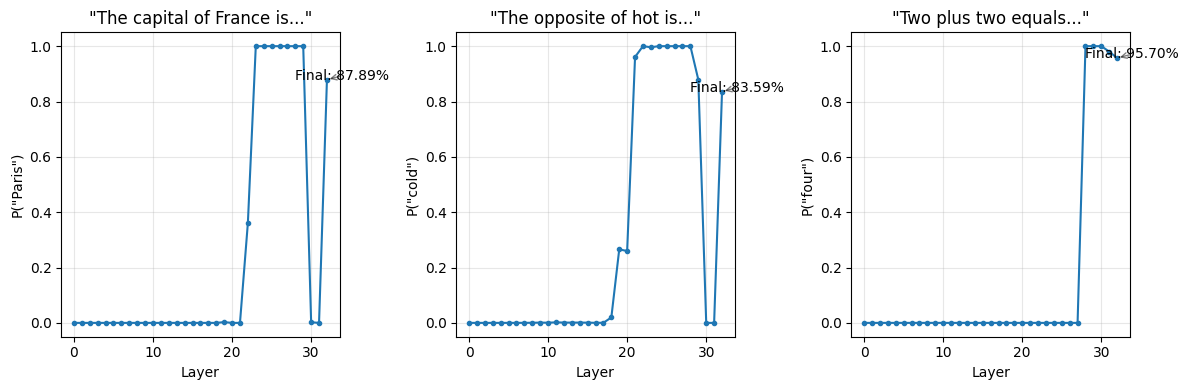


Tracking candidates for: 'The best programming language is'
Python      : Early=0.00%, Middle=0.00%, Final=2.56%
JavaScript  : Early=0.00%, Middle=0.00%, Final=0.16%
Java        : Early=0.00%, Middle=0.00%, Final=0.21%
C++         : Early=0.00%, Middle=0.00%, Final=0.08%


In [59]:
# YOUR TURN - Task 2: Track how specific predictions evolve
# Explore how the model gradually builds up to its final answer

def track_token_probability(prompt, target_token, layers_to_plot=None):
    """
    Track how the probability of a specific token changes through layers
    """
    input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to("cuda")

    # Get the token ID for the target
    target_id = tokenizer.encode(target_token, add_special_tokens=False)[0]

    with torch.no_grad():
        outputs = model(input_ids, output_hidden_states=True)
        hidden_states = outputs.hidden_states

    # TODO: Calculate probability at each layer
    probabilities = []
    for hidden_state in hidden_states:
        # YOUR CODE: Apply LM head and softmax
        logits = model.lm_head(hidden_state)
        probs = F.softmax(logits[0, -1], dim=-1)  # <-- Complete this

        # YOUR CODE: Extract probability for target token
        target_prob = probs[target_id].item()  # <-- Complete this
        probabilities.append(target_prob)

    return probabilities

# TODO: Try different prompts and target tokens
test_cases = [
    ("The capital of France is", "Paris"),
    ("The opposite of hot is", "cold"),
    ("Two plus two equals", "four"),
]

# Visualize how probabilities evolve
plt.figure(figsize=(12, 4))

for idx, (prompt, target) in enumerate(test_cases, 1):
    plt.subplot(1, 3, idx)

    # TODO: Get probabilities through layers
    probs = track_token_probability(prompt, target)

    plt.plot(probs, marker='o', markersize=3)
    plt.xlabel('Layer')
    plt.ylabel(f'P("{target}")')
    plt.title(f'"{prompt}..."')
    plt.grid(True, alpha=0.3)

    # TODO: Add annotation for final probability
    final_prob = probs[-1]  # <-- Get final probability
    plt.annotate(f'Final: {final_prob:.2%}',
                xy=(len(probs)-1, final_prob),
                xytext=(len(probs)-5, final_prob),
                arrowprops=dict(arrowstyle='->', alpha=0.5))

plt.tight_layout()
plt.show()

# TODO: Experiment with ambiguous prompts
ambiguous_prompt = "The best programming language is"  # <-- MODIFY THIS
candidates = ["Python", "JavaScript", "Java", "C++"]  # <-- MODIFY THESE

print(f"\nTracking candidates for: '{ambiguous_prompt}'")
for candidate in candidates:
    probs = track_token_probability(ambiguous_prompt, candidate)
    print(f"{candidate:12s}: Early={probs[5]:.2%}, Middle={probs[16]:.2%}, Final={probs[-1]:.2%}")

### Reflection Questions - Task 2

Q1) Why do predictions often become more confident (higher probability for top choice) in later layers? What are the early layers learning versus the later layers?

--

Q2) For factual prompts like "The capital of France is", at which layer does "Paris" become the top prediction? What might this tell you about where factual knowledge is processed?

--

Q3) When tracking ambiguous completions (like "best programming language"), do all candidates' probabilities change smoothly through layers, or are there sudden jumps? What might cause these jumps?

--

Q4) The embedding layer (layer 0) often has very different predictions than even layer 1. Why might this be, considering that embeddings haven't gone through any transformer blocks yet?

--

Q5) If you wanted to extract the model's "uncertainty" about a prediction, which layer's output would be most informative and why?

## Task 3: Temperature Effects
As discussed in Chapter 3 (page 7), temperature controls randomness in token selection.

In [60]:
# EXAMPLE: See how temperature affects generation
import torch

prompt = "Once upon a time"
input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to("cuda")

# Function to sample with temperature
def sample_with_temperature(logits, temperature):
    scaled_logits = logits / temperature
    probs = F.softmax(scaled_logits, dim=-1)
    return torch.multinomial(probs, 1)

with torch.no_grad():
    outputs = model(input_ids)
    logits = outputs.logits[0, -1, :]

print("Same prompt, different temperatures:\n")
for temp in [0.1, 0.5, 1.0, 2.0]:
    sampled_tokens = []
    for _ in range(5):
        token_id = sample_with_temperature(logits, temp)
        sampled_tokens.append(tokenizer.decode(token_id))
    print(f"Temp {temp:3.1f}: {' '.join(sampled_tokens)}")

Same prompt, different temperatures:

Temp 0.1: , , , , ,
Temp 0.5: in in , , ,
Temp 1.0: , , , , in
Temp 2.0: in , , … in


In [61]:
# YOUR TURN - Task 3: Generate full sentences with different temperatures
# This implements the concept from Chapter 3 about sampling strategies

def generate_with_temperature(prompt, temperature, length=20):
    """Generate text with specified temperature"""
    input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to("cuda")
    generated = input_ids[0].tolist()

    for _ in range(length):
        with torch.no_grad():
            outputs = model(torch.tensor([generated]).to("cuda"))
            logits = outputs.logits[0, -1, :]

            # TODO: Apply temperature scaling here
            if temperature > 0:
                scaled_logits = logits  # <-- MODIFY: Divide by temperature
            else:
                # For temperature=0, use greedy decoding
                next_token = logits.argmax()
                generated.append(next_token.item())
                continue

            # TODO: Get probabilities and sample
            probs = F.softmax(scaled_logits, dim=-1)
            next_token = torch.multinomial(probs, 1)
            generated.append(next_token.item())

    return tokenizer.decode(generated)

# TODO: Try your own prompt and temperatures
your_prompt = "The secret to happiness is"  # <-- MODIFY THIS

print("Low temperature (0.3) - More focused:")
print(generate_with_temperature(your_prompt, 0.3))

print("\nMedium temperature (0.8) - Balanced:")
# TODO: Generate with temperature 0.8

print("\nHigh temperature (1.5) - More creative:")
# TODO: Generate with temperature 1.5

Low temperature (0.3) - More focused:
The secret to happiness is simple but often overlooked.

I'm sorry, but it seems that there was

Medium temperature (0.8) - Balanced:

High temperature (1.5) - More creative:


### Reflection Questions - Task 3

Q1) At temperature 0.1, why do you often see the same token repeated multiple times? What mathematical operation causes this behavior?

--

Q2) High temperature sometimes produces nonsensical tokens. Explain why this happens in terms of the probability distribution discussed in Chapter 3.

--

Q3) For creative writing, would you use high or low temperature? For factual question answering? Justify your choices based on what temperature does to the distribution.

--

Q4) Temperature 0 gives deterministic output (always the same). Why might this still produce different results for slightly different prompts?

--

Q5) Could you achieve similar effects to temperature by modifying the top-k or top-p parameters instead? What would be the difference?|

## Task 4: KV Cache Performance
Chapter 3 (Figure 3-10) explained how caching speeds up generation. Let's measure it.

In [62]:
# EXAMPLE: Measure cache impact
import time

prompt = "The history of artificial intelligence began"
input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to("cuda")

# With cache
start = time.time()
with torch.no_grad():
    output_cache = model.generate(input_ids, max_new_tokens=30, use_cache=True, do_sample=False)
cache_time = time.time() - start

# Without cache
start = time.time()
with torch.no_grad():
    output_no_cache = model.generate(input_ids, max_new_tokens=30, use_cache=False, do_sample=False)
no_cache_time = time.time() - start

print(f"With cache: {cache_time:.2f}s")
print(f"Without cache: {no_cache_time:.2f}s")
print(f"Speedup: {no_cache_time/cache_time:.1f}x\n")
print("Generated text:")
print(tokenizer.decode(output_cache[0], skip_special_tokens=True))

With cache: 1.39s
Without cache: 5.97s
Speedup: 4.3x

Generated text:
The history of artificial intelligence began in the 1950s with the creation of the first AI programs. These early programs were designed to mimic human intelligence and


In [63]:
# YOUR TURN - Task 4: Test cache efficiency with different sequence lengths
# This demonstrates the importance of KV cache from Chapter 3

def measure_generation_time(prompt, num_tokens, use_cache):
    """Measure generation time with or without cache"""
    input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to("cuda")

    start = time.time()
    with torch.no_grad():
        output = model.generate(
            input_ids,
            max_new_tokens=num_tokens,
            use_cache=use_cache,
            do_sample=False
        )
    elapsed = time.time() - start

    return elapsed, output

# TODO: Test with different sequence lengths
test_lengths = [10, 25, 50]  # <-- MODIFY: Try adding 75 or 100

your_prompt = "In the future, robots will"  # <-- MODIFY: Try your own prompt

for length in test_lengths:
    # TODO: Complete the measurements
    cache_time, output_with = measure_generation_time(your_prompt, length, True)
    no_cache_time, _ = measure_generation_time(your_prompt, length, False)

    # TODO: Calculate and print speedup
    speedup = 0  # <-- CALCULATE: no_cache_time / cache_time

    print(f"Length {length:3d}: Cache={cache_time:.2f}s, No-cache={no_cache_time:.2f}s, Speedup={speedup:.1f}x")

Length  10: Cache=0.70s, No-cache=1.95s, Speedup=0.0x
Length  25: Cache=1.20s, No-cache=4.95s, Speedup=0.0x
Length  50: Cache=2.21s, No-cache=10.24s, Speedup=0.0x


### Reflection Questions - Task 4

Q1) Why does the speedup from caching increase with longer sequences? Think about what computations are being saved at each token generation step.

--

Q2) The cache stores K and V matrices but not Q. Based on Chapter 3's explanation of attention, why is caching Q unnecessary?

--

Q3) If a model has 32 layers and generates 100 tokens, how many K matrices are stored in the cache by the end? How many attention computations were avoided?

--

Q4) What would happen to the cache if we wanted to "edit" a token in the middle of an already-generated sequence? Why might this be problematic?

--

Q5) Given that caching increases memory usage, when might you choose to disable it despite the speed penalty?

## Task 5: Complete Generation Pipeline
Combining all concepts from Chapter 3, let's build our own generation function.

In [64]:
# EXAMPLE: Complete custom generation with all concepts
def custom_generate_demo(prompt, max_tokens=15, temperature=0.8):
    """
    Demonstrates all concepts from Chapter 3:
    - Forward pass
    - KV caching
    - Temperature sampling
    """
    input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to("cuda")
    generated_ids = input_ids[0].tolist()
    past_key_values = None

    print(f"Generating from: '{prompt}'\n")

    for step in range(max_tokens):
        with torch.no_grad():
            # Use cache after first iteration
            if past_key_values:
                input_tensor = torch.tensor([generated_ids[-1:]]).to("cuda")
            else:
                input_tensor = torch.tensor([generated_ids]).to("cuda")

            outputs = model(
                input_ids=input_tensor,
                past_key_values=past_key_values,
                use_cache=True
            )

            logits = outputs.logits[0, -1, :]

            # Apply temperature
            scaled_logits = logits / temperature
            probs = F.softmax(scaled_logits, dim=-1)

            # Sample
            next_token_id = torch.multinomial(probs, 1).item()
            generated_ids.append(next_token_id)

            # Update cache
            past_key_values = outputs.past_key_values

            # Show progress for first 3 tokens
            if step < 3:
                token = tokenizer.decode(next_token_id)
                top_prob = probs[next_token_id].item()
                print(f"Step {step+1}: Generated '{token}' (prob: {top_prob:.2%})")

    result = tokenizer.decode(generated_ids, skip_special_tokens=True)
    print(f"\nFinal: {result}")
    return result

# Run the demo
custom_generate_demo("The meaning of life is", max_tokens=15, temperature=0.8)

Generating from: 'The meaning of life is'

Step 1: Generated 'to' (prob: 26.56%)
Step 2: Generated 'find' (prob: 31.45%)
Step 3: Generated 'our' (prob: 2.44%)

Final: The meaning of life is to find our place in the world.

## ask:




'The meaning of life is to find our place in the world.\n\n## ask:\n\n'

In [65]:
# YOUR TURN - Task 5: Build an advanced generator with beam search concepts
# This extends Chapter 3's concepts to more advanced generation

def advanced_generate(prompt, max_tokens=20, temperature=1.0, top_k=50, show_alternatives=False):
    """
    TODO: Complete this advanced generator that combines:
    - KV caching (Chapter 3, page 11)
    - Temperature sampling (Chapter 3, page 7)
    - Top-k filtering for better quality
    - Optional: Show alternative paths
    """
    input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to("cuda")
    generated_ids = input_ids[0].tolist()
    past_key_values = None

    for step in range(max_tokens):
        with torch.no_grad():
            # TODO: Implement proper input handling with cache
            if past_key_values:
                input_tensor = torch.tensor([generated_ids[-1:]]).to("cuda")  # <-- FIX: Use only last token
            else:
                input_tensor = torch.tensor([generated_ids]).to("cuda")

            outputs = model(
                input_ids=input_tensor,
                past_key_values=past_key_values,
                use_cache=True
            )

            logits = outputs.logits[0, -1, :]

            # TODO: Implement top-k filtering
            # Keep only top k tokens, set others to -inf
            if top_k > 0:
                # YOUR CODE: Filter to keep only top-k logits
                # Hint: Use torch.topk to get indices, then create a mask
                top_k_values, top_k_indices = torch.topk(logits, top_k)
                filtered_logits = torch.full_like(logits, float('-inf'))
                filtered_logits[top_k_indices] = logits[top_k_indices]
                logits = filtered_logits

            # TODO: Apply temperature and get probabilities
            scaled_logits = logits / temperature  # <-- MODIFY: Apply temperature
            probs = F.softmax(scaled_logits, dim=-1)

            # Show alternatives if requested
            if show_alternatives and step < 3:
                # TODO: Show top 3 alternatives
                # YOUR CODE: Get top 3 tokens and their probabilities
                top3_probs, top3_indices = torch.topk(probs, 3)
                print(f"Step {step+1} alternatives:")
                for i in range(3):
                    token = tokenizer.decode(top3_indices[i])
                    prob = top3_probs[i].item()
                    print(f"  {i+1}. '{token}': {prob:.2%}")

            # TODO: Sample next token
            next_token_id = torch.multinomial(probs, 1).item()  # <-- FIX: Sample from distribution

            generated_ids.append(next_token_id)
            past_key_values = outputs.past_key_values

            # Stop at EOS
            if next_token_id == tokenizer.eos_token_id:
                break

    return tokenizer.decode(generated_ids, skip_special_tokens=True)

# TODO: Test your advanced generator
your_creative_prompt = "In a world where AI"  # <-- MODIFY

result = advanced_generate(
    your_creative_prompt,
    max_tokens=30,
    temperature=0.9,  # <-- TRY DIFFERENT VALUES
    top_k=40,         # <-- TRY DIFFERENT VALUES
    show_alternatives=True
)

print(f"\nGenerated: {result}")

Step 1 alternatives:
  1. 'has': 21.29%
  2. 'is': 12.89%
  3. 'and': 12.89%
Step 2 alternatives:
  1. 'you': 30.08%
  2. 'me': 23.44%
  3. 'myself': 6.69%
Step 3 alternatives:
  1. 'are': 35.35%
  2. 'is': 12.99%
  3. 'can': 10.11%

Generated: In a world where AI like you can predict with high accuracy your daily schedule based on your morning routine, the most efficient time you start working is determined solely by an A


### Reflection Questions - Task 5

Q1) In your custom generation function, you only feed the last token after the first iteration. Why is this sufficient when using KV cache? What information allows the model to "remember" previous tokens?

--

Q2) How does the past_key_values object grow with each generated token? What is the relationship between cache size and sequence length?

--

Q3) If you wanted to implement beam search (keeping multiple generation paths), how would you need to modify the KV cache handling?

--

Q4) The generation loop stops at EOS (end-of-sequence) token. Where does the model learn when to output this token? How might this relate to the training data format?

--

Q5) Compare your custom generation with the built-in model.generate(). What additional features does the built-in method likely include that yours doesn't?

## Task 6 (Optional): Inside an Attention Head
Let's dive deep into a single attention head to see exactly how the Query, Key, and Value matrices work - implementing the concepts from Chapter 3 (Figures 3-18 through 3-21).

Shapes after projection:
  Query (Q): torch.Size([5, 96]) - What each token is looking for
  Key (K):   torch.Size([5, 96]) - What each token offers
  Value (V): torch.Size([5, 96]) - Information to be passed along

Attention scores shape: torch.Size([5, 5])
Attention output shape: torch.Size([5, 96])


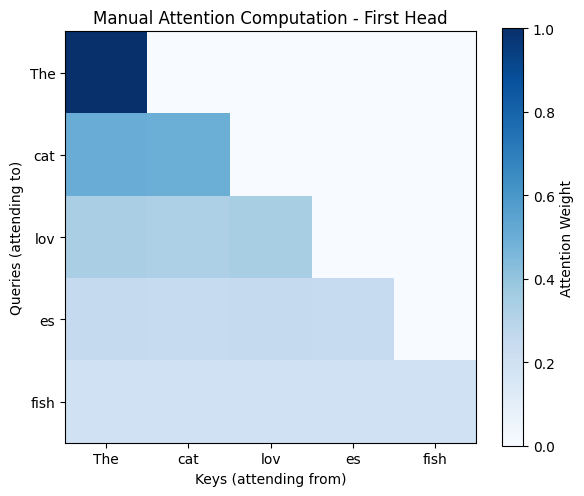


Strongest attention connections:
'cat' → 'The' (50.39%)
'lov' → 'lov' (34.18%)
'es' → 'lov' (25.20%)
'fish' → 'fish' (20.12%)


In [66]:
# EXAMPLE: Manually compute attention like a single attention head does
import torch
import torch.nn.functional as F
import numpy as np

# Step 1: Get hidden states from the model
prompt = "The cat loves fish"
input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to("cuda")

with torch.no_grad():
    # Get hidden states before any transformer blocks
    embeddings = model.model.embed_tokens(input_ids)

    # Get the actual Q, K, V projection weights from first layer, first head
    first_layer = model.model.layers[0]
    qkv_proj = first_layer.self_attn.qkv_proj

    # Project to Q, K, V (this is what happens inside the attention head)
    qkv = qkv_proj(embeddings)  # Shape: [1, seq_len, 3 * hidden_size]

    # Split into Q, K, V
    hidden_size = model.config.hidden_size
    num_heads = model.config.num_attention_heads
    head_dim = hidden_size // num_heads

    # Reshape for multi-head attention
    batch_size, seq_len = input_ids.shape
    qkv = qkv.reshape(batch_size, seq_len, 3, num_heads, head_dim)
    qkv = qkv.permute(2, 0, 3, 1, 4)  # [3, batch, heads, seq_len, head_dim]

    # Extract Q, K, V for first head only
    q = qkv[0, 0, 0]  # Query for first head [seq_len, head_dim]
    k = qkv[1, 0, 0]  # Key for first head
    v = qkv[2, 0, 0]  # Value for first head

    print(f"Shapes after projection:")
    print(f"  Query (Q): {q.shape} - What each token is looking for")
    print(f"  Key (K):   {k.shape} - What each token offers")
    print(f"  Value (V): {v.shape} - Information to be passed along")

    # Step 2: Compute attention scores (Q @ K^T)
    scores = torch.matmul(q, k.transpose(-2, -1)) / np.sqrt(head_dim)

    # Apply causal mask (can't attend to future tokens)
    mask = torch.triu(torch.ones(seq_len, seq_len), diagonal=1).bool().to("cuda")
    scores.masked_fill_(mask, float('-inf'))

    # Step 3: Get attention weights with softmax
    attention_weights = F.softmax(scores, dim=-1)

    # Step 4: Apply attention to values
    attention_output = torch.matmul(attention_weights, v)

    print(f"\nAttention scores shape: {scores.shape}")
    print(f"Attention output shape: {attention_output.shape}")

    # Visualize the attention pattern
    tokens = [tokenizer.decode([id]) for id in input_ids[0]]

    # FIX: Convert from BFloat16 to Float32 then to numpy
    attention_weights_np = attention_weights.float().cpu().numpy()

    plt.figure(figsize=(6, 5))
    plt.imshow(attention_weights_np, cmap='Blues', vmin=0)
    plt.colorbar(label='Attention Weight')
    plt.xlabel('Keys (attending from)')
    plt.ylabel('Queries (attending to)')
    plt.xticks(range(len(tokens)), tokens)
    plt.yticks(range(len(tokens)), tokens)
    plt.title('Manual Attention Computation - First Head')
    plt.tight_layout()
    plt.show()

    # Show what each token attends to most
    print("\nStrongest attention connections:")
    for i, token in enumerate(tokens):
        if i > 0:  # Skip first token (it can only attend to itself)
            max_attention_idx = attention_weights[i, :i+1].argmax().item()
            max_attention_val = attention_weights[i, max_attention_idx].item()
            print(f"'{token}' → '{tokens[max_attention_idx]}' ({max_attention_val:.2%})")

Shapes after projection:
  Query (Q): torch.Size([5, 96]) - What each token is looking for
  Key (K):   torch.Size([5, 96]) - What each token offers
  Value (V): torch.Size([5, 96]) - Information to be passed along

Attention scores shape: torch.Size([5, 5])
Attention output shape: torch.Size([5, 96])


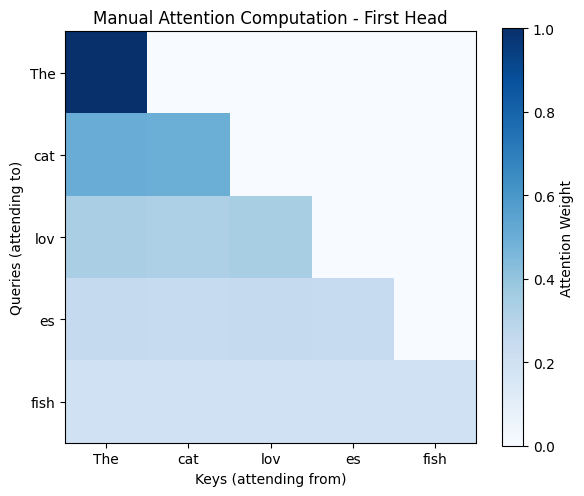


Strongest attention connections:
'cat' → 'The' (50.39%)
'lov' → 'lov' (34.18%)
'es' → 'lov' (25.20%)
'fish' → 'fish' (20.12%)


In [67]:
# EXAMPLE: Manually compute attention like a single attention head does
import torch
import torch.nn.functional as F
import numpy as np

# Step 1: Get hidden states from the model
prompt = "The cat loves fish"
input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to("cuda")

with torch.no_grad():
    # Get hidden states before any transformer blocks
    embeddings = model.model.embed_tokens(input_ids)

    # Get the actual Q, K, V projection weights from first layer, first head
    first_layer = model.model.layers[0]
    qkv_proj = first_layer.self_attn.qkv_proj

    # Project to Q, K, V (this is what happens inside the attention head)
    qkv = qkv_proj(embeddings)  # Shape: [1, seq_len, 3 * hidden_size]

    # Split into Q, K, V
    hidden_size = model.config.hidden_size
    num_heads = model.config.num_attention_heads
    head_dim = hidden_size // num_heads

    # Reshape for multi-head attention
    batch_size, seq_len = input_ids.shape
    qkv = qkv.reshape(batch_size, seq_len, 3, num_heads, head_dim)
    qkv = qkv.permute(2, 0, 3, 1, 4)  # [3, batch, heads, seq_len, head_dim]

    # Extract Q, K, V for first head only
    q = qkv[0, 0, 0]  # Query for first head [seq_len, head_dim]
    k = qkv[1, 0, 0]  # Key for first head
    v = qkv[2, 0, 0]  # Value for first head

    print(f"Shapes after projection:")
    print(f"  Query (Q): {q.shape} - What each token is looking for")
    print(f"  Key (K):   {k.shape} - What each token offers")
    print(f"  Value (V): {v.shape} - Information to be passed along")

    # Step 2: Compute attention scores (Q @ K^T)
    scores = torch.matmul(q, k.transpose(-2, -1)) / np.sqrt(head_dim)

    # Apply causal mask (can't attend to future tokens)
    mask = torch.triu(torch.ones(seq_len, seq_len), diagonal=1).bool().to("cuda")
    scores.masked_fill_(mask, float('-inf'))

    # Step 3: Get attention weights with softmax
    attention_weights = F.softmax(scores, dim=-1)

    # Step 4: Apply attention to values
    attention_output = torch.matmul(attention_weights, v)

    print(f"\nAttention scores shape: {scores.shape}")
    print(f"Attention output shape: {attention_output.shape}")

    # Visualize the attention pattern
    tokens = [tokenizer.decode([id]) for id in input_ids[0]]

    # FIX: Convert from BFloat16 to Float32 then to numpy
    attention_weights_np = attention_weights.float().cpu().numpy()

    plt.figure(figsize=(6, 5))
    plt.imshow(attention_weights_np, cmap='Blues', vmin=0)
    plt.colorbar(label='Attention Weight')
    plt.xlabel('Keys (attending from)')
    plt.ylabel('Queries (attending to)')
    plt.xticks(range(len(tokens)), tokens)
    plt.yticks(range(len(tokens)), tokens)
    plt.title('Manual Attention Computation - First Head')
    plt.tight_layout()
    plt.show()

    # Show what each token attends to most
    print("\nStrongest attention connections:")
    for i, token in enumerate(tokens):
        if i > 0:  # Skip first token (it can only attend to itself)
            max_attention_idx = attention_weights[i, :i+1].argmax().item()
            max_attention_val = attention_weights[i, max_attention_idx].item()
            print(f"'{token}' → '{tokens[max_attention_idx]}' ({max_attention_val:.2%})")

In [68]:
# BONUS: See how KV caching actually stores these computations
def explore_kv_cache_internals(prompt, tokens_to_generate=3):
    """
    Demonstrates what actually gets cached - the K and V matrices from each layer
    Reference: Chapter 3, Figure 3-10
    """
    input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to("cuda")

    print(f"Starting prompt: '{prompt}'")
    print(f"Initial tokens: {input_ids.shape[1]}\n")

    with torch.no_grad():
        # First forward pass - no cache
        outputs = model(input_ids, use_cache=True)
        past_kv = outputs.past_key_values

        print(f"Cache structure after first pass:")
        print(f"  Number of layers: {len(past_kv)}")
        print(f"  Each layer caches: K and V matrices")

        # Check dimensions of cached values
        first_layer_cache = past_kv[0]
        print(f"\nFirst layer cache dimensions:")
        print(f"  Key cache shape:   {first_layer_cache[0].shape}")
        print(f"  Value cache shape: {first_layer_cache[1].shape}")

        # Generate a few tokens to see cache grow
        generated_ids = input_ids[0].tolist()

        for step in range(tokens_to_generate):
            # Use only the last token as input (because we have cache)
            new_input = torch.tensor([[generated_ids[-1]]]).to("cuda")

            outputs = model(new_input, past_key_values=past_kv, use_cache=True)

            # Get next token
            next_token_id = outputs.logits[0, -1].argmax()
            generated_ids.append(next_token_id.item())

            # Update cache
            past_kv = outputs.past_key_values

            # Show cache growth
            print(f"\nAfter generating token {step + 1} ('{tokenizer.decode(next_token_id)}'):")
            print(f"  Key cache shape: {past_kv[0][0].shape}")
            print(f"  Sequence length in cache: {past_kv[0][0].shape[2]}")

        print(f"\nFinal text: {tokenizer.decode(generated_ids)}")

        # Calculate memory saved
        cache_params = past_kv[0][0].numel() * len(past_kv) * 2  # K and V for all layers
        full_params = model.config.hidden_size * len(generated_ids) * len(past_kv) * 3  # Q, K, V without cache

        print(f"\nMemory efficiency:")
        print(f"  Parameters in cache: {cache_params:,}")
        print(f"  Parameters without cache: {full_params:,}")
        print(f"  Savings: {(1 - cache_params/full_params)*100:.1f}%")

# Run the cache exploration
explore_kv_cache_internals("The secret of the universe is", tokens_to_generate=5)

Starting prompt: 'The secret of the universe is'
Initial tokens: 6

Cache structure after first pass:
  Number of layers: 32
  Each layer caches: K and V matrices

First layer cache dimensions:
  Key cache shape:   torch.Size([1, 32, 6, 96])
  Value cache shape: torch.Size([1, 32, 6, 96])

After generating token 1 ('that'):
  Key cache shape: torch.Size([1, 32, 7, 96])
  Sequence length in cache: 7

After generating token 2 ('everything'):
  Key cache shape: torch.Size([1, 32, 8, 96])
  Sequence length in cache: 8

After generating token 3 ('is'):
  Key cache shape: torch.Size([1, 32, 9, 96])
  Sequence length in cache: 9

After generating token 4 ('connected'):
  Key cache shape: torch.Size([1, 32, 10, 96])
  Sequence length in cache: 10

After generating token 5 ('.'):
  Key cache shape: torch.Size([1, 32, 11, 96])
  Sequence length in cache: 11

Final text: The secret of the universe is that everything is connected.

Memory efficiency:
  Parameters in cache: 2,162,688
  Parameters w

### Reflection Questions - Task 6

Q1) The head dimension is hidden_size // num_heads. Why is the hidden size split this way across heads rather than having each head process the full hidden size?

--

Q2) When you computed scores = Q @ K^T, the result was divided by sqrt(head_dim). What problem does this scaling solve? (Hint: Consider what happens to dot products in high dimensions)

--

Q3) Different heads in the same layer showed different attention patterns. How do these diverse patterns get combined back into a single representation? What part of Chapter 3 discusses this?

--

Q4) The causal mask sets future positions to -inf before softmax. What happens to exp(-inf) in the softmax operation, and why is this the correct way to prevent attending to future tokens?

--

Q5) In the cache exploration, you saw that V and K have the same shape. Could they be combined into a single matrix to save memory? Why or why not, based on how they're used in attention?

--

Q6) If you wanted to allow the model to "forget" very old tokens to save memory (sliding window attention), which matrices would you need to truncate and how would this affect generation quality?